# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_act=pd.read_csv('../data/act.csv')
df_act.head(3)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


In [3]:
df_sat=pd.read_csv('../data/sat.csv')
df_sat.head

<bound method NDFrame.head of     Unnamed: 0                 State Participation  \
0            0               Alabama            5%   
1            1                Alaska           38%   
2            2               Arizona           30%   
3            3              Arkansas            3%   
4            4            California           53%   
5            5              Colorado           11%   
6            6           Connecticut          100%   
7            7              Delaware          100%   
8            8  District of Columbia          100%   
9            9               Florida           83%   
10          10               Georgia           61%   
11          11                Hawaii           55%   
12          12                 Idaho           93%   
13          13              Illinois            9%   
14          14               Indiana           63%   
15          15                  Iowa            2%   
16          16                Kansas            4%  

In [4]:
# You know what's weird? Maryland' score is reading in as '52' when it's supposed to be '524'
df_sat.Math.loc[20]


52

In [5]:
# Let's fix that.
df_sat['Math'] = df_sat['Math'].replace(52, 524)
df_sat.Math.loc[20]

524

##### 2. Print the first ten rows of each dataframe.

In [6]:
print(df_act.head(10))
print(df_sat.head(10))

   Unnamed: 0                 State Participation  English  Math  Reading  \
0           0              National           60%     20.3  20.7     21.4   
1           1               Alabama          100%     18.9  18.4     19.7   
2           2                Alaska           65%     18.7  19.8     20.4   
3           3               Arizona           62%     18.6  19.8     20.1   
4           4              Arkansas          100%     18.9  19.0     19.7   
5           5            California           31%     22.5  22.7     23.1   
6           6              Colorado          100%     20.1  20.3     21.2   
7           7           Connecticut           31%     25.5  24.6     25.6   
8           8              Delaware           18%     24.1  23.4     24.8   
9           9  District of Columbia           32%     24.4  23.5     24.9   

   Science  Composite  
0     21.0       21.0  
1     19.4       19.2  
2     19.9       19.8  
3     19.8       19.7  
4     19.5       19.4  
5     22

##### 3. Describe in words what each variable (column) is.

In [7]:
print(df_act.columns)

Index(['Unnamed: 0', 'State', 'Participation', 'English', 'Math', 'Reading',
       'Science', 'Composite'],
      dtype='object')


### ACT: 
* State: d'oh.
* Participation: Percentage of eligible students in the state who took the assessment
* English: Average Score of all students in that state on the English assessment
* Math: Average Score of all students in that state on the Math assessment
* Reading: Average Score of all students in that state on the Reading assessment
* Science: Average Score of all students in that state on the Science assessment
* Composite: Average of four assessment scores

In [8]:
print(df_sat.columns)

Index(['Unnamed: 0', 'State', 'Participation',
       'Evidence-Based Reading and Writing', 'Math', 'Total'],
      dtype='object')


### SAT: 
* State: d'oh.
* Participation: Percentage of eligible students in the state who took the assessment
* Reading and Writing: Average Score of all students in that state on the English assessment
* Math: Average Score of all students in that state on the Math assessment
* Total: Sum of other two scores

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [9]:
print(df_sat.isnull().sum())
print(df_sat.max())

Unnamed: 0                            0
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64
Unnamed: 0                                 50
State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object


In [10]:
print(df_act.isnull().sum())
print(df_act.Participation.max())
# So the max of participation should be 100%, not 98%. This is because it's an object not int

Unnamed: 0       0
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64
98%


In [11]:
df_sat.Participation.value_counts()

3%      8
100%    4
2%      3
4%      3
5%      2
65%     2
11%     2
93%     1
10%     1
30%     1
53%     1
64%     1
71%     1
7%      1
12%     1
14%     1
83%     1
95%     1
69%     1
38%     1
50%     1
96%     1
62%     1
67%     1
76%     1
55%     1
9%      1
61%     1
26%     1
60%     1
63%     1
49%     1
70%     1
43%     1
Name: Participation, dtype: int64

##### 5. Print the types of each column.

In [12]:
print(df_act.dtypes)
print(df_sat.dtypes)

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [13]:
# Yeah, like I mentioned earlier, the participation columns need to become numeric.
print(df_act['Participation'].dtypes)

object


In [14]:
# We have to remove the percent sign first
df_act['Participate'] = df_act['Participation'].str[:-1]
df_act.drop(['Participation'], axis=1, inplace=True)

In [15]:
# Now we can convert the column type to numeric
df_act['Participate']=pd.to_numeric(df_act['Participate'], errors='coerce')
print(df_act['Participate'].dtypes)

int64


In [16]:
# And now let's do the same thing for SAT:
df_sat['Participate'] = df_sat['Participation'].str[:-1]
df_sat.drop(['Participation'], axis=1, inplace=True)
df_sat['Participate']=pd.to_numeric(df_sat['Participate'], errors='coerce')
print(df_sat['Participate'].dtypes)

int64


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [17]:
# First the ACt

In [18]:
df_act.columns

Index(['Unnamed: 0', 'State', 'English', 'Math', 'Reading', 'Science',
       'Composite', 'Participate'],
      dtype='object')

In [19]:
# let's drop that unnamed column, it's not necessary:
df_act.drop('Unnamed: 0', axis=1, inplace=True)
df_act.columns

Index(['State', 'English', 'Math', 'Reading', 'Science', 'Composite',
       'Participate'],
      dtype='object')

In [20]:
keys = df_act['State']
values = df_act.English
act_dict1 = dict(zip(keys, values))

In [21]:
keys = df_act['State']
values = df_act.Math
act_dict2 = dict(zip(keys, values))

In [22]:
keys = df_act['State']
values = df_act.Participate
act_dict0 = dict(zip(keys, values))

In [23]:
# Now the SAT

In [24]:
df_sat.columns

Index(['Unnamed: 0', 'State', 'Evidence-Based Reading and Writing', 'Math',
       'Total', 'Participate'],
      dtype='object')

In [25]:
# let's drop that unnamed column, it's not necessary:
df_sat.drop('Unnamed: 0', axis=1, inplace=True)
df_sat.columns

Index(['State', 'Evidence-Based Reading and Writing', 'Math', 'Total',
       'Participate'],
      dtype='object')

In [26]:
# Let's rename that column with the long name:
df_sat.rename(columns = {'Evidence-Based Reading and Writing': 'English'}, inplace=True);

In [27]:
keys = df_sat['State']
values = df_sat.English
sat_dict1 = dict(zip(keys, values))

In [28]:
keys = df_sat['State']
values = df_sat.Math
sat_dict2 = dict(zip(keys, values))

In [29]:
keys = df_sat['State']
values = df_sat.Participate
sat_dict0 = dict(zip(keys, values))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [30]:
# First the ACT:
list(df_act.columns)

['State', 'English', 'Math', 'Reading', 'Science', 'Composite', 'Participate']

In [31]:
# You know what? Let's drop Science, Reading, and Composite, too. Nobody really cares about those.
df_act.drop(['Reading', 'Science', 'Composite'], axis=1, inplace=True)
df_act.columns

Index(['State', 'English', 'Math', 'Participate'], dtype='object')

In [32]:
# and make the dictionary:
keys = list(df_act.columns)
values = []
values.append([df_act['State']])
values.append([df_act['English']])
values.append([df_act['Math']])
values.append([df_act['Participate']])
act_dict = dict(zip(keys, values))

In [33]:
# How's it look? Pretty damn good, if I do say so myself.
act_dict

{'English': [0     20.3
  1     18.9
  2     18.7
  3     18.6
  4     18.9
  5     22.5
  6     20.1
  7     25.5
  8     24.1
  9     24.4
  10    19.0
  11    21.0
  12    17.8
  13    21.9
  14    21.0
  15    22.0
  16    21.2
  17    21.1
  18    19.6
  19    19.4
  20    24.2
  21    23.3
  22    25.4
  23    24.1
  24    20.4
  25    18.2
  26    19.8
  27    19.0
  28    20.9
  29    16.3
  30    25.4
  31    23.8
  32    18.6
  33    23.8
  34    17.8
  35    19.0
  36    21.2
  37    18.5
  38    21.2
  39    23.4
  40    24.0
  41    17.5
  42    20.7
  43    19.5
  44    19.5
  45    19.5
  46    23.3
  47    23.5
  48    20.9
  49    20.0
  50    19.7
  51    19.4
  Name: English, dtype: float64], 'Math': [0     20.7
  1     18.4
  2     19.8
  3     19.8
  4     19.0
  5     22.7
  6     20.3
  7     24.6
  8     23.4
  9     23.5
  10    19.4
  11    20.9
  12    19.2
  13    21.8
  14    21.2
  15    22.4
  16    21.3
  17    21.3
  18    19.4
  19    18.8
  20    24.0

In [34]:
# Now the SAT:
list(df_sat.columns)

['State', 'English', 'Math', 'Total', 'Participate']

In [35]:
# You know what? Let's drop Total. I bet we don't really need it later in this project.
df_sat.drop(['Total'], axis=1, inplace=True)
df_sat.columns

Index(['State', 'English', 'Math', 'Participate'], dtype='object')

In [36]:
# and make the dictionary:
keys = list(df_sat.columns)
values = []
values.append([df_sat['State']])
values.append([df_sat['English']])
values.append([df_sat['Math']])
values.append([df_sat['Participate']])
sat_dict = dict(zip(keys, values))

In [37]:
# How's it look? Okie-dokie.
sat_dict

{'English': [0     593
  1     547
  2     563
  3     614
  4     531
  5     606
  6     530
  7     503
  8     482
  9     520
  10    535
  11    544
  12    513
  13    559
  14    542
  15    641
  16    632
  17    631
  18    611
  19    513
  20    536
  21    555
  22    509
  23    644
  24    634
  25    640
  26    605
  27    629
  28    563
  29    532
  30    530
  31    577
  32    528
  33    546
  34    635
  35    578
  36    530
  37    560
  38    540
  39    539
  40    543
  41    612
  42    623
  43    513
  44    624
  45    562
  46    561
  47    541
  48    558
  49    642
  50    626
  Name: English, dtype: int64], 'Math': [0     572
  1     533
  2     553
  3     594
  4     524
  5     595
  6     512
  7     492
  8     468
  9     497
  10    515
  11    541
  12    493
  13    556
  14    532
  15    635
  16    628
  17    616
  18    586
  19    499
  20    524
  21    551
  22    495
  23    651
  24    607
  25    631
  26    591
  27    625
  

##### 9. Merge the dataframes on the state column.

In [38]:
# Houston, we have a problem: different lengths.
print(len(df_act['State']))
print(len(df_sat['State']))

52
51


In [39]:
# I assume that the 51st is DC, but what's that 52nd state? Puerto Rico?
df_act['State']
# Oh, it's National. Don't really need that because it's just an aggregate of other columns.
# Let's give it the axe.
df_act=df_act[df_act.State != 'National']
print(len(df_act['State']))

51


In [40]:
# Before merging, we have to reset the indices so they line up.
df_sat.reset_index(drop=True, inplace=True)
df_act.reset_index(drop=True, inplace=True)

In [41]:
# and now we can merge them together:
df_both=pd.concat([df_act, df_sat], axis=1)
df_both

,State,English,Math,Participate,State,English,Math,Participate
0,Alabama,18.9,18.4,100,Alabama,593,572,5
1,Alaska,18.7,19.8,65,Alaska,547,533,38
2,Arizona,18.6,19.8,62,Arizona,563,553,30
3,Arkansas,18.9,19.0,100,Arkansas,614,594,3
4,California,22.5,22.7,31,California,531,524,53
5,Colorado,20.1,20.3,100,Colorado,606,595,11
6,Connecticut,25.5,24.6,31,Connecticut,530,512,100
7,Delaware,24.1,23.4,18,Delaware,503,492,100
8,District of Columbia,24.4,23.5,32,District of Columbia,482,468,100
9,Florida,19.0,19.4,73,Florida,520,497,83


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [42]:
df_both.columns

Index(['State', 'English', 'Math', 'Participate', 'State', 'English', 'Math',
       'Participate'],
      dtype='object')

In [43]:
# Let's rename:
cols = ['State', 'ACT_English', 'ACT_Math', 'ACT_Participate', 'SAT_State', 'SAT_English', 'SAT_Math',
       'SAT_Participate']
df_both.columns=cols
# Also, let's drop the second state 'cuz its redundant
df_both.drop(['SAT_State'], axis=1, inplace=True)
df_both.columns

Index(['State', 'ACT_English', 'ACT_Math', 'ACT_Participate', 'SAT_English',
       'SAT_Math', 'SAT_Participate'],
      dtype='object')

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [44]:
print('*minimum*', df_both.min())
print('*maximum*', df_both.max())

*minimum* State              Alabama
ACT_English           16.3
ACT_Math                18
ACT_Participate          8
SAT_English            482
SAT_Math               468
SAT_Participate          2
dtype: object
*maximum* State              Wyoming
ACT_English           25.5
ACT_Math              25.3
ACT_Participate        100
SAT_English            644
SAT_Math               651
SAT_Participate        100
dtype: object


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [45]:
# It's 1:00 am. Sorry, but I'm taking the short cut on this one.
sd=[]
for x in ['ACT_English', 'ACT_Math', 'ACT_Participate', 'SAT_English',
       'SAT_Math', 'SAT_Participate']:
    y=std_devs=np.std(df_both[x])
    sd.append(y)
sd

[2.3304876369363363,
 1.9624620273436781,
 31.824175751231806,
 45.21697020437866,
 46.65713364485503,
 34.92907076664508]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [46]:
df_both.tail()

,State,ACT_English,ACT_Math,ACT_Participate,SAT_English,SAT_Math,SAT_Participate
46,Virginia,23.5,23.3,29,561,541,65
47,Washington,20.9,21.9,29,541,534,64
48,West Virginia,20.0,19.4,69,558,528,14
49,Wisconsin,19.7,20.4,100,642,649,3
50,Wyoming,19.4,19.8,100,626,604,3


In [47]:
# First, we need to insert a label at the beginning of our std dev values
sd.insert(0,'std_dev')
sd

['std_dev',
 2.3304876369363363,
 1.9624620273436781,
 31.824175751231806,
 45.21697020437866,
 46.65713364485503,
 34.92907076664508]

In [48]:
# now we insert std dev as a new observation (i.e., row) at the end of the dataframe.

df_both.loc[-1] = sd
print(df_both.tail())
df_both=df_both[df_both.State != 'std_dev']


             State  ACT_English   ACT_Math  ACT_Participate  SAT_English  \
 47     Washington    20.900000  21.900000        29.000000    541.00000   
 48  West Virginia    20.000000  19.400000        69.000000    558.00000   
 49      Wisconsin    19.700000  20.400000       100.000000    642.00000   
 50        Wyoming    19.400000  19.800000       100.000000    626.00000   
-1         std_dev     2.330488   1.962462        31.824176     45.21697   

       SAT_Math  SAT_Participate  
 47  534.000000        64.000000  
 48  528.000000        14.000000  
 49  649.000000         3.000000  
 50  604.000000         3.000000  
-1    46.657134        34.929071  


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [49]:
df_both.sort_values(['SAT_Participate'], ascending = False, inplace=True)
df_both.head()

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State,ACT_English,ACT_Math,ACT_Participate,SAT_English,SAT_Math,SAT_Participate
8,District of Columbia,24.4,23.5,32.0,482.0,468.0,100.0
22,Michigan,24.1,23.7,29.0,509.0,495.0,100.0
6,Connecticut,25.5,24.6,31.0,530.0,512.0,100.0
7,Delaware,24.1,23.4,18.0,503.0,492.0,100.0
29,New Hampshire,25.4,25.1,18.0,532.0,520.0,96.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [50]:
df_both[df_both['SAT_Participate']>50]

,State,ACT_English,ACT_Math,ACT_Participate,SAT_English,SAT_Math,SAT_Participate
8,District of Columbia,24.4,23.5,32.0,482.0,468.0,100.0
22,Michigan,24.1,23.7,29.0,509.0,495.0,100.0
6,Connecticut,25.5,24.6,31.0,530.0,512.0,100.0
7,Delaware,24.1,23.4,18.0,503.0,492.0,100.0
29,New Hampshire,25.4,25.1,18.0,532.0,520.0,96.0
19,Maine,24.2,24.0,8.0,513.0,499.0,95.0
12,Idaho,21.9,21.8,38.0,513.0,493.0,93.0
9,Florida,19.0,19.4,73.0,520.0,497.0,83.0
21,Massachusetts,25.4,25.3,29.0,555.0,551.0,76.0
39,Rhode Island,24.0,23.3,21.0,539.0,524.0,71.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [51]:
# display plots in the notebook
%matplotlib inline

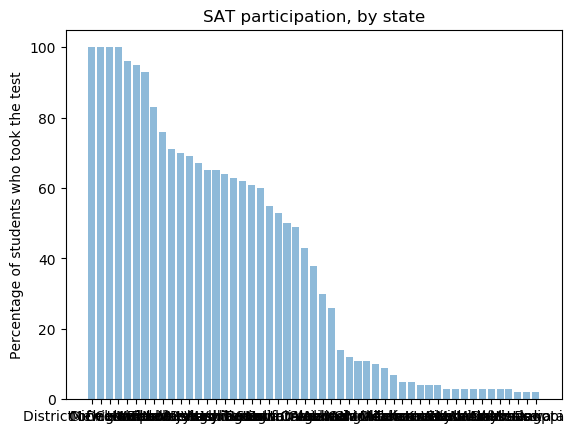

In [52]:
# Histogram of SAT participation
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(df_both.State))
 
plt.bar(y_pos, df_both.SAT_Participate, align='center', alpha=0.5)
plt.xticks(y_pos, df_both.State)
plt.ylabel('Percentage of students who took the test')
plt.title('SAT participation, by state')
 
plt.show()

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


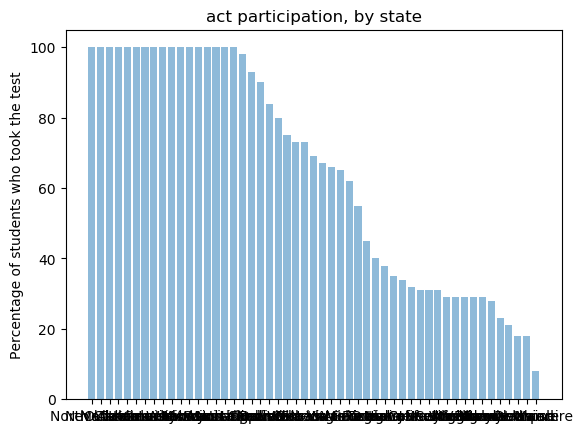

In [53]:
# For the ACT, first we need to sort the states by participation:
df_both.sort_values(['ACT_Participate'], ascending = False, inplace=True)

# Then generate the histogram
y_pos = np.arange(len(df_both.State))
 
plt.bar(y_pos, df_both.ACT_Participate, align='center', alpha=0.5)
plt.xticks(y_pos, df_both.State)
plt.ylabel('Percentage of students who took the test')
plt.title('act participation, by state')
 
plt.show()

##### 17. Plot the Math(s) distributions from both data sets.

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


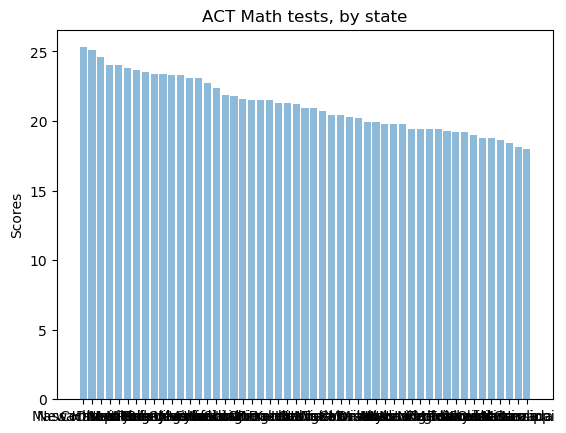

In [54]:
# For the SAT, first we need to sort the states by MATH:
df_both.sort_values(['ACT_Math'], ascending = False, inplace=True)

# Then generate the histogram
y_pos = np.arange(len(df_both.State))
 
plt.bar(y_pos, df_both.ACT_Math, align='center', alpha=0.5)
plt.xticks(y_pos, df_both.State)
plt.ylabel('Scores')
plt.title('ACT Math tests, by state')
 
plt.show()

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


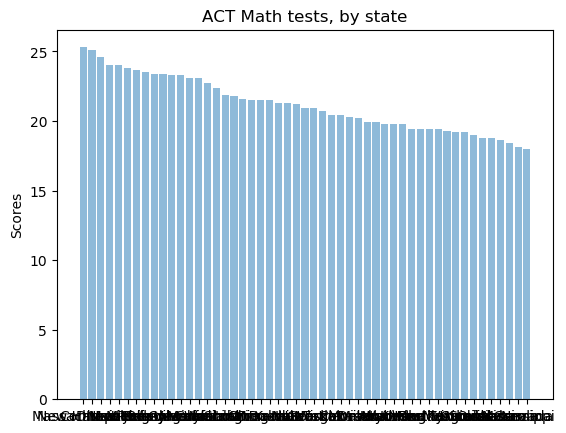

In [55]:
# For the ACT, first we need to sort the states by MATH:
df_both.sort_values(['ACT_Math'], ascending = False, inplace=True)

# Then generate the histogram
y_pos = np.arange(len(df_both.State))
 
plt.bar(y_pos, df_both.ACT_Math, align='center', alpha=0.5)
plt.xticks(y_pos, df_both.State)
plt.ylabel('Scores')
plt.title('ACT Math tests, by state')
 
plt.show()

##### 18. Plot the Verbal distributions from both data sets.

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


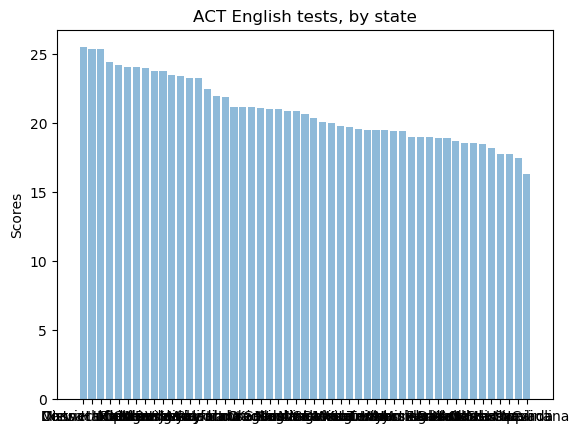

In [56]:
# For the ACT, first we need to sort the states by Reading:
df_both.sort_values(['ACT_English'], ascending = False, inplace=True)

# Then generate the histogram
y_pos = np.arange(len(df_both.State))
 
plt.bar(y_pos, df_both.ACT_English, align='center', alpha=0.5)
plt.xticks(y_pos, df_both.State)
plt.ylabel('Scores')
plt.title('ACT English tests, by state')
 
plt.show()

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


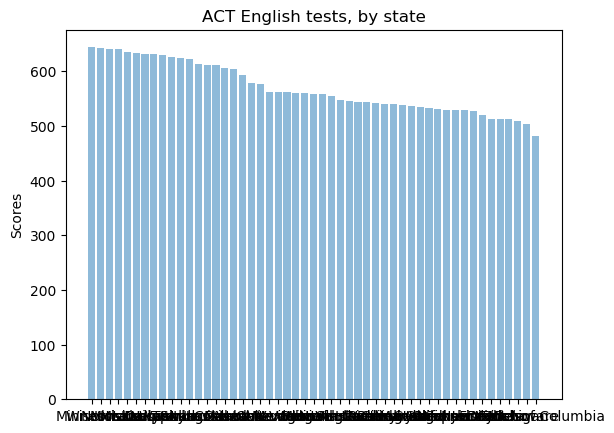

In [57]:
# For the SAT, first we need to sort the states by Reading:
df_both.sort_values(['SAT_English'], ascending = False, inplace=True)

# Then generate the histogram
y_pos = np.arange(len(df_both.State))
 
plt.bar(y_pos, df_both.SAT_English, align='center', alpha=0.5)
plt.xticks(y_pos, df_both.State)
plt.ylabel('Scores')
plt.title('ACT English tests, by state')
 
plt.show()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [58]:
# That the data are normally distributed

##### 20. Does this assumption hold true for any of our columns? Which?

In [59]:
# No, it does not.

##### 21. Plot some scatterplots examining relationships between all variables.

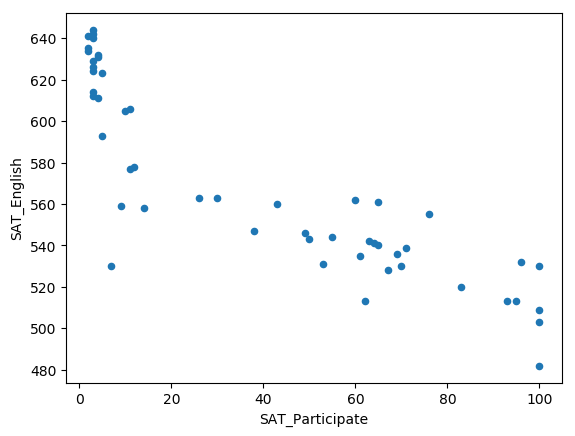

In [60]:
# As participation goes up, English scores go down!
df_both.plot(x='SAT_Participate',y='SAT_English',kind='scatter')
plt.show()

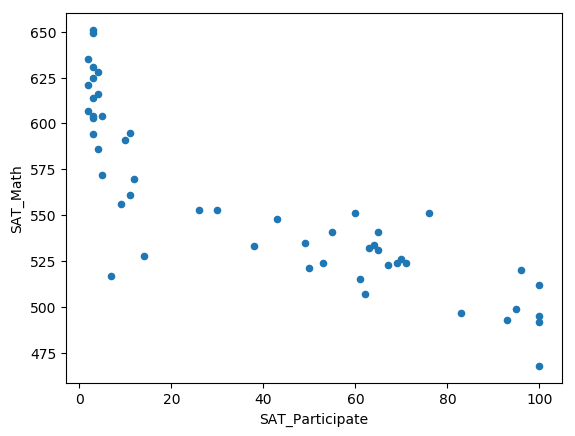

In [61]:
# Also true in Math
df_both.plot(x='SAT_Participate',y='SAT_Math',kind='scatter')
plt.show()

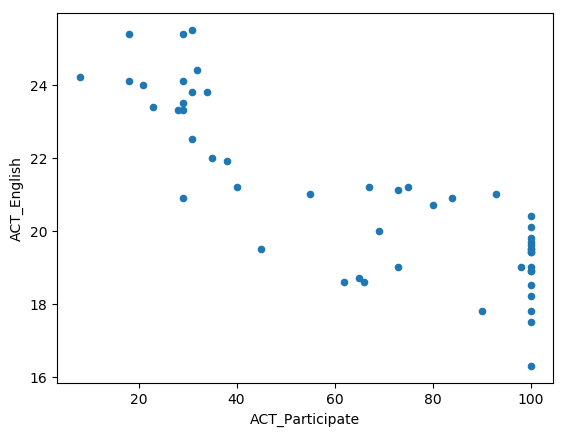

In [62]:
# Even more noticeable on the ACT English
df_both.plot(x='ACT_Participate',y='ACT_English',kind='scatter')
plt.show()

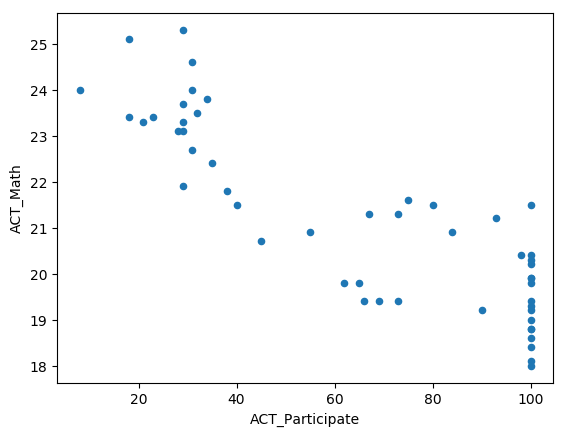

In [63]:
# ACT Math is worst of all
df_both.plot(x='ACT_Participate',y='ACT_Math',kind='scatter')
plt.show()

In [64]:
df_sat.corr(method='pearson', min_periods=1)

,English,Math,Participate
English,1.000000,0.987056,-0.874326
Math,0.987056,1.000000,-0.855091
Participate,-0.874326,-0.855091,1.000000


In [65]:
df_act.corr(method='pearson', min_periods=1)

,English,Math,Participate
English,1.000000,0.967803,-0.843501
Math,0.967803,1.000000,-0.861114
Participate,-0.843501,-0.861114,1.000000


In [66]:
# Let's run a correlation table and see which are the highest with participation:
print(df_sat.corr(method='pearson', min_periods=1))
print(df_act.corr(method='pearson', min_periods=1))
# Yeah, Math and Reading scores are negatively correlated with participation, and it's about .84!
# Math and Reading are highly correlated with each other (in a positive direction)

              English      Math  Participate
English      1.000000  0.987056    -0.874326
Math         0.987056  1.000000    -0.855091
Participate -0.874326 -0.855091     1.000000
              English      Math  Participate
English      1.000000  0.967803    -0.843501
Math         0.967803  1.000000    -0.861114
Participate -0.843501 -0.861114     1.000000


##### 22. Are there any interesting relationships to note?

In [67]:
# Yes. Increased participation results in decreased average performance.

##### 23. Create box plots for each variable. 

In [68]:
df_both.columns

Index(['State', 'ACT_English', 'ACT_Math', 'ACT_Participate', 'SAT_English',
       'SAT_Math', 'SAT_Participate'],
      dtype='object')

In [69]:
#df_both.drop(['SAT_English', 'SAT_Math', 'SAT_Participate'], axis=1, inplace=True)

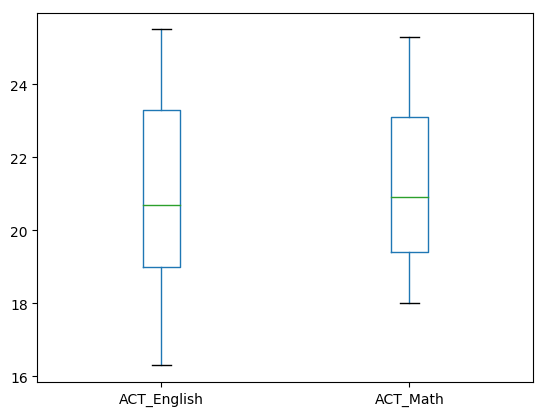

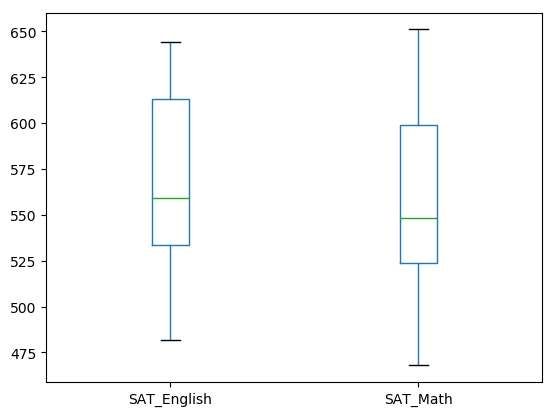

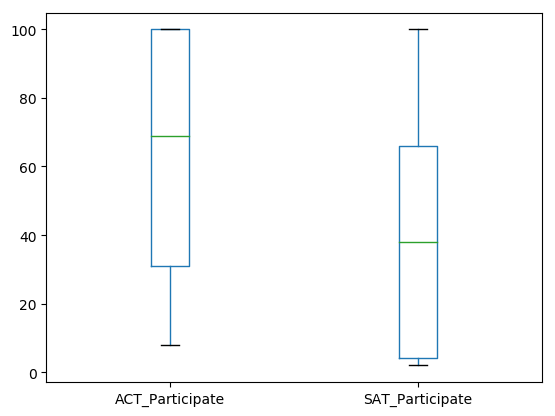

In [70]:
# How about just for the variables that have comparable scales:
df_both.drop(['SAT_English', 'SAT_Math', 'SAT_Participate', 'ACT_Participate'],axis=1).plot(kind='box')
df_both.drop(['ACT_English', 'ACT_Math', 'SAT_Participate', 'ACT_Participate'],axis=1).plot(kind='box')
df_both.drop(['ACT_English', 'ACT_Math', 'SAT_English', 'SAT_Math',],axis=1).plot(kind='box')

plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [71]:
# Center, shape and spread
print(df_both.mean())
print(df_both.std())
# None of the histograms looked normal.
# The ACT has a much higher participation rate than the SAT

ACT_English         20.931373
ACT_Math            21.182353
ACT_Participate     65.254902
SAT_English        569.117647
SAT_Math           556.882353
SAT_Participate     39.803922
dtype: float64
ACT_English         2.353677
ACT_Math            1.981989
ACT_Participate    32.140842
SAT_English        45.666901
SAT_Math           47.121395
SAT_Participate    35.276632
dtype: float64


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [72]:
# As we saw with the correlation table above:
# Math and Reading scores are negatively correlated with participation, and it's about .84!
# Math and Reading are highly correlated with each other (in a positive direction)

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [73]:
import scipy.stats as stats
import numpy as np
stats.ttest_ind(df_both.SAT_Participate,df_both.ACT_Participate)
# The p-value is very low (well below .05) 
# so we reject the null hypothesis (the means are identical)
# we accept the alt hypothesis (mean ACT and SAT participation rates are different)

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [74]:
# SAT:
stats.norm.interval(0.95, loc=df_both.SAT_Participate.mean(), scale=df_both.SAT_Participate.std())
# We 95% confident that the true mean exists somewhere between these values.

(-29.337007176461576, 108.94485031371647)

In [75]:
# ACT:
stats.norm.interval(0.95, loc=df_both.ACT_Participate.mean(), scale=df_both.ACT_Participate.std())
# We 95% confident that the true mean exists somewhere between these values.

(2.260009176854382, 128.24979474471422)

In [76]:
# Actually, these intervals don't make any sense but it' s 3:15 in the morning so I'll figure it out later

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [77]:
# Well, I expected them to give essentially the same results but they didn't.
# I think that's because I generated the Conf Intervals incorrectly.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [78]:
# Yes. They are correlated at rho=-0.42. This is not a very strong correlation (below .5) - see below.
# but indicates that when a state scores higher on SAT, their average ACT score drops.
# This is possibly due to self-selection of high (or low) scoring students into one or the other test.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [79]:
# Yes, I think their participation rates are correlated by state because students will take
# either one or the other but not both.
df_both.corr(method='pearson', min_periods=1)

,ACT_English,ACT_Math,ACT_Participate,SAT_English,SAT_Math,SAT_Participate
ACT_English,1.000000,0.967803,-0.843501,-0.461345,-0.420673,0.686889
ACT_Math,0.967803,1.000000,-0.861114,-0.486126,-0.420456,0.710697
ACT_Participate,-0.843501,-0.861114,1.000000,0.716153,0.682572,-0.841234
SAT_English,-0.461345,-0.486126,0.716153,1.000000,0.987056,-0.874326
SAT_Math,-0.420673,-0.420456,0.682572,0.987056,1.000000,-0.855091
SAT_Participate,0.686889,0.710697,-0.841234,-0.874326,-0.855091,1.000000


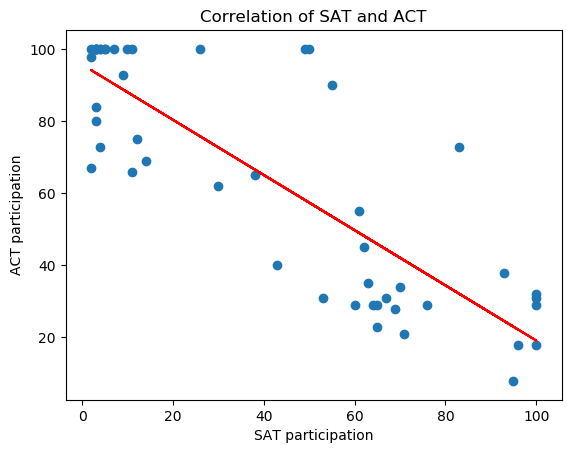

In [84]:
n = 51
x=df_both['SAT_Participate']
y=df_both['ACT_Participate']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.title("Correlation of SAT and ACT")
plt.xlabel("SAT participation")
plt.ylabel("ACT participation")
plt.show()

In [85]:
# Let's take a look at who those outliers are (check the carolinas!)
df_both.sort_values(['SAT_Participate'], ascending = False)

,State,ACT_English,ACT_Math,ACT_Participate,SAT_English,SAT_Math,SAT_Participate
8,District of Columbia,24.4,23.5,32.0,482.0,468.0,100.0
7,Delaware,24.1,23.4,18.0,503.0,492.0,100.0
22,Michigan,24.1,23.7,29.0,509.0,495.0,100.0
6,Connecticut,25.5,24.6,31.0,530.0,512.0,100.0
29,New Hampshire,25.4,25.1,18.0,532.0,520.0,96.0
19,Maine,24.2,24.0,8.0,513.0,499.0,95.0
12,Idaho,21.9,21.8,38.0,513.0,493.0,93.0
9,Florida,19.0,19.4,73.0,520.0,497.0,83.0
21,Massachusetts,25.4,25.3,29.0,555.0,551.0,76.0
39,Rhode Island,24.0,23.3,21.0,539.0,524.0,71.0
